# Load Libraries 

In [2]:
import pandas as pd # used for dataframes and preprocessing 
import numpy as np # used for mathematical operations with arrays 
import matplotlib.pyplot as plt # used for plotting graphs
from sklearn.neighbors import KNeighborsClassifier # Used to build a logistic regression model 
import seaborn as sns # used to enhance data visualizations
from sklearn.model_selection import train_test_split # used to split dataset into testing and training subsets
from sklearn.metrics import classification_report # used to compute classification report for accuracy, includes precision, f1-score, support, recall 
from sklearn.model_selection import KFold, cross_val_score # used conduct k-fold cross validation and compute the cross validation score 

# Step 1: Load Data 

In [3]:
# file path for diabetes csv 
diabetesfile = "C:/Users/dgmur/OneDrive/Desktop/ADTA 5340 Discovery and Learning with Big Data/pima_diabetes.csv"

#convert csv into dataframe 
diabetes = pd.read_csv(diabetesfile)

#print dataset
print(diabetes.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


The file path to retrieve the pima diabetes csv assigned to the variable diabetes file. Then the csv is converted into a dataframe, and then assigned to diabetes. Lastly, diabetes.head() will output the first 5 rows of diabetes.

# Step 2: Preprocess the Data

In [5]:
#check number of rows and columns 
print(diabetes.shape)

#check data types of columns 
print(diabetes.info)

#check for missing values
print(diabetes.isnull().sum())

#replace NaNS with zeros
diabetes[[ 'preg' , 'plas' , 'pres' ,'skin', 'test', 'mass', 'pedi', 'age']] \
= diabetes[['preg' , 'plas' , 'pres' ,'skin', 'test', 'mass', 'pedi', 'age' ]].replace(0,np.NaN)
#Replace nas with the mean of the column
diabetes = diabetes.fillna(diabetes.mean())


(768, 9)
<bound method DataFrame.info of           preg   plas  pres      skin        test  mass   pedi  age  class
0     6.000000  148.0  72.0  35.00000  155.548223  33.6  0.627   50      1
1     1.000000   85.0  66.0  29.00000  155.548223  26.6  0.351   31      0
2     8.000000  183.0  64.0  29.15342  155.548223  23.3  0.672   32      1
3     1.000000   89.0  66.0  23.00000   94.000000  28.1  0.167   21      0
4     4.494673  137.0  40.0  35.00000  168.000000  43.1  2.288   33      1
..         ...    ...   ...       ...         ...   ...    ...  ...    ...
763  10.000000  101.0  76.0  48.00000  180.000000  32.9  0.171   63      0
764   2.000000  122.0  70.0  27.00000  155.548223  36.8  0.340   27      0
765   5.000000  121.0  72.0  23.00000  112.000000  26.2  0.245   30      0
766   1.000000  126.0  60.0  29.15342  155.548223  30.1  0.349   47      1
767   1.000000   93.0  70.0  31.00000  155.548223  30.4  0.315   23      0

[768 rows x 9 columns]>
preg     0
plas     0
pres     0
s

diabetes.isnull().sum() is implemented to check the total number of null values per column.Since, there are missing values in some of the columns, these were replaced with the mean value for the column , and the NaNs were replaced with zeros.  To show the information about diabetes, like data types of each column, print(diabetes.info()),  The dimensions of diabetes is checked by using the diabetes.shape function.

# Step 3: EDA

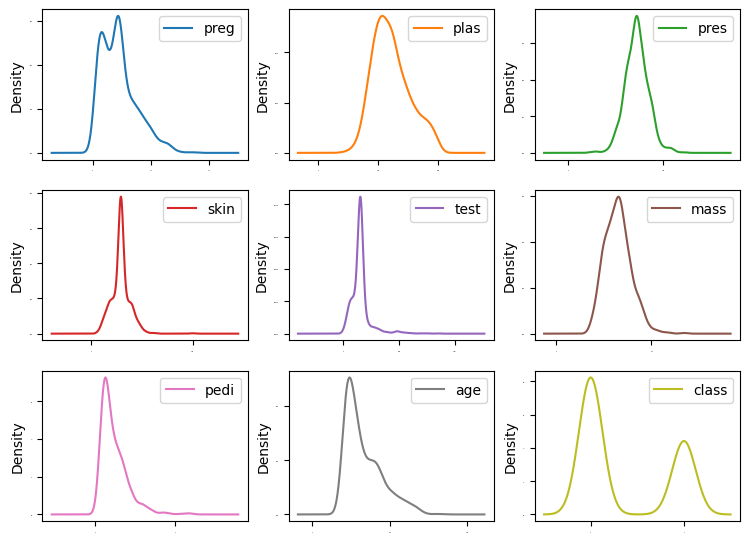

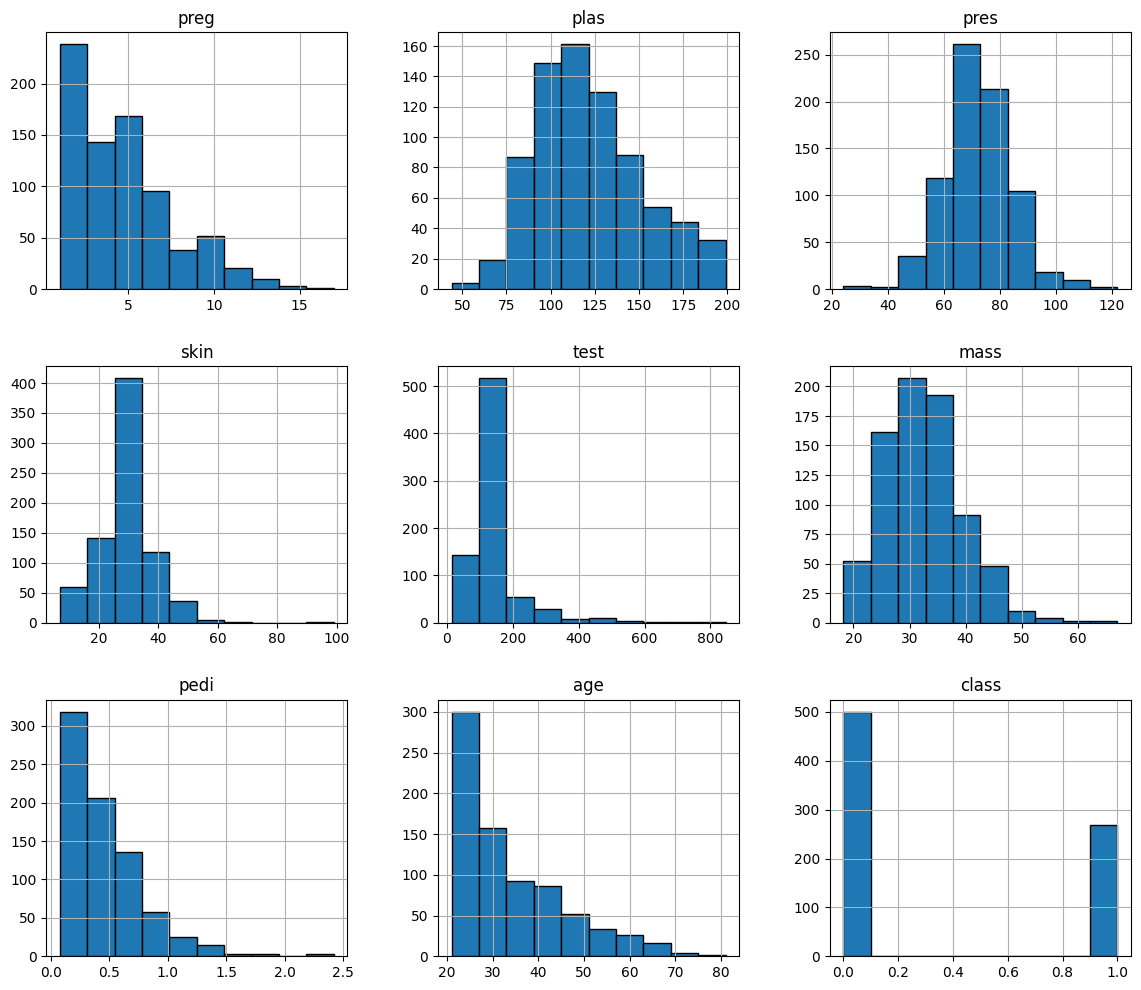

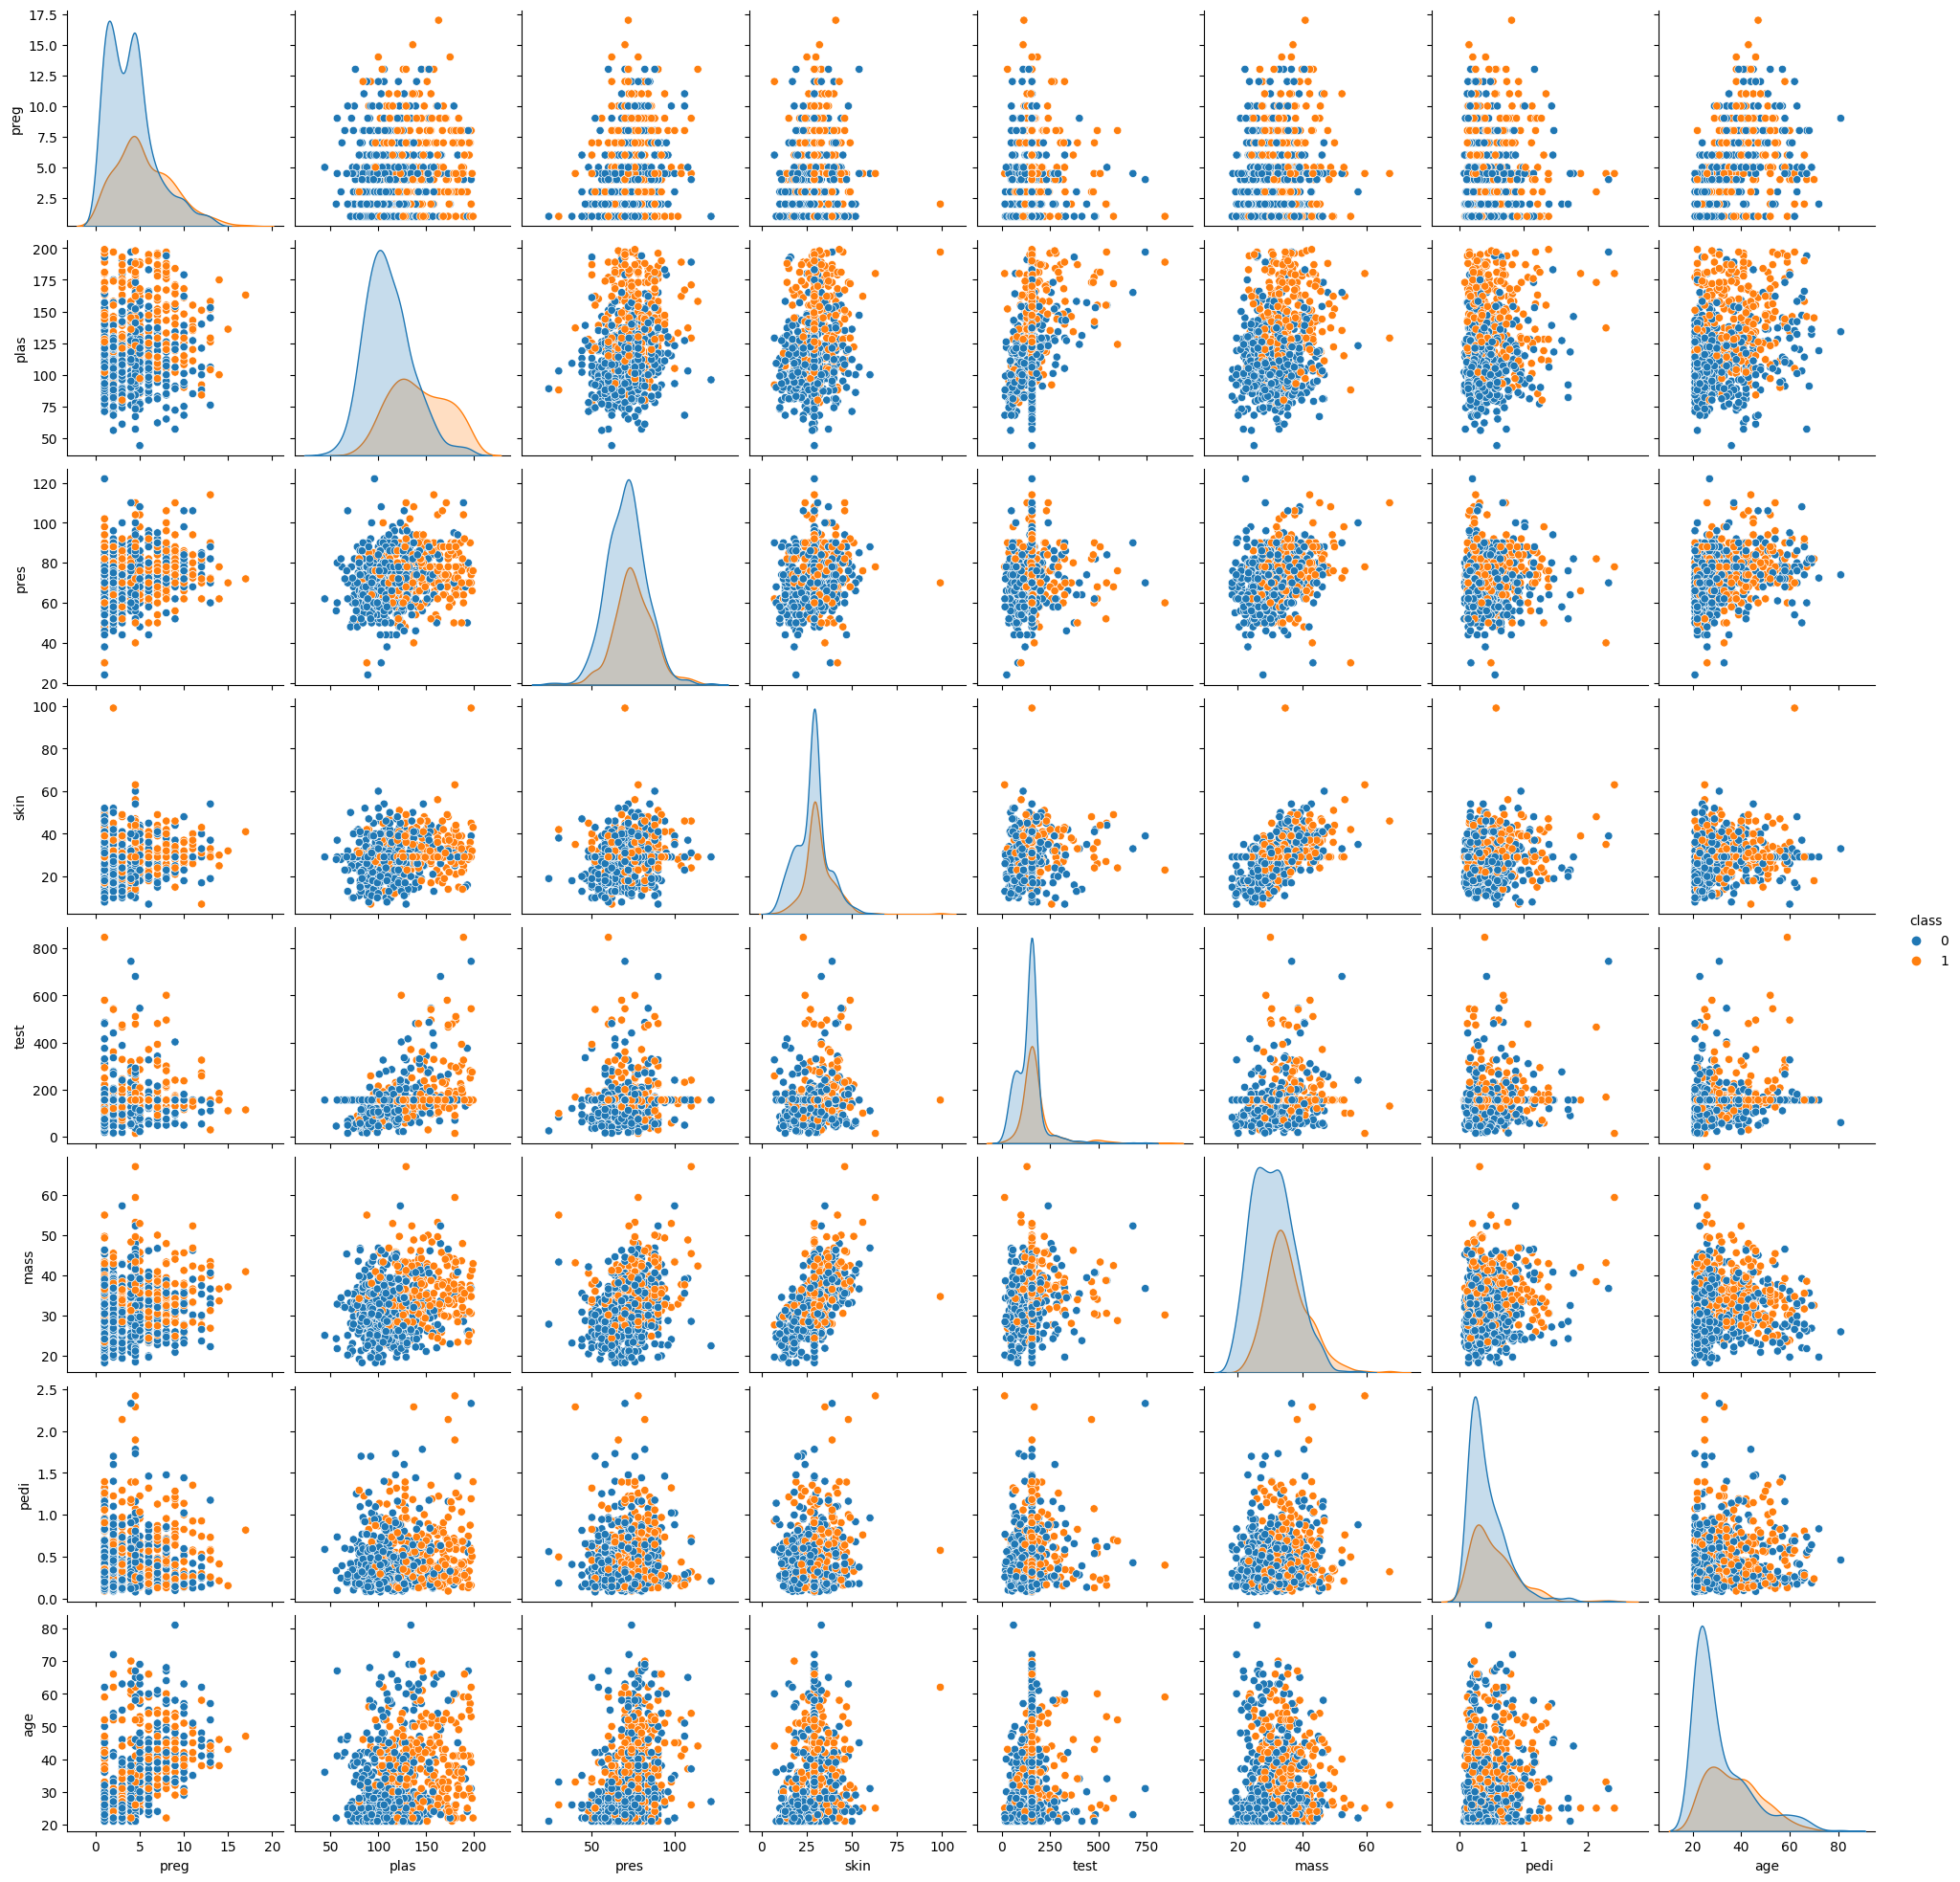

In [6]:
# Shows summary statistics 
diabetes.describe()

#number of diabetes with vs number of diabetes without
diabetes.groupby('class').size()

# density plots 
# 9 numerical variables so 3 plots per column 
diabetes.plot(kind = 'density', subplots= True, layout= (4,3), sharex= False, legend = True, fontsize = 1, figsize= (9,9))
#Histograms 
diabetes.hist(edgecolor = 'black', figsize= (14,12))

#pairplot color based on class 
sns.pairplot(diabetes, hue = 'class', height = 2.5)

This block of code consists of EDA. First the summary statistics of diabetes which has the count, mean, minimum, standard deviation, 25% quartile value, median, 75% quartile and the maximum is outputted, this is done by using  df.describe. Next 3 plots were implemented for data visualization,2 plots for univariate, and 1 plot for multivariate. For the univariate visualizations, 9 histograms and 9  density plots were displayed for the numerical variables of the dataset by using diabetes.hist() and diabetes.plot where the kind parameter is specified to density.For the multivariate visualization,  a pairwise plot is used where the color of the scatter points is based on the class column this is done by using the sns.pairplot() where the hue parameter is specified to ‘class’. 

# step 4: Separate Data into X and Y

In [8]:
#convert values of diabetes into an array
array = diabetes.values

#Predictor variables as the X
X = array[:,0:8]

# Response Variable as the Y 

Y = array[:,8]

diabetes is converted into an array, and assigned the variable, array. The variable, array is sliced to only include all the rows of the column index 0 to,but not including 8, these will be predictor variables, and are assigned to the variable X. For the response variable, array is sliced to only include all of the rows of the column index 8, this is assigned to Y

# Step 5: Split data into Train and Test

In [9]:
#set seed for replicability 
seed = 7 
# Perform a test/train split of 70/30
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=7)

 For this code block, the X and Y will be split into a train/test split where the train had 70% of the data, and the test had 30% of the data.  The seed variable was assigned to a value 7, this was meant for replicability purposes. To conduct a train, test split in python, the train_test_split() is used where the random state is equal to seed. X_train and Y_train will represent the training subset, and X_test and Y_test will represent the testing subset.

# Step 6: Build and Train Model

In [14]:
#call the logistic regression function 
model = KNeighborsClassifier(5)

#train model 
model.fit(x_train, y_train)

#Use classification report
pred = model.predict(x_test)

results = classification_report(y_test, pred)

print("Classification Report:")
print()
print(results)

Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.77       147
         1.0       0.59      0.52      0.55        84

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



This code is used to build and train the model. First, KNeighborsClassifier(), which is used to conduct KNN where the k is 5, is assigned to the variable model. Then x_train and y_train are used to fit the linear regression model using model.fit(). Then the model will make a prediction of the response variable based on x_test, this is done by using the model.predict(), then the results will be stored as pred. Lastly a classification report is used for pred, this will display the precision, recall, f1-score support for accuracy of the logistic regression model. 

# Step 7: Score accuracy of the model

In [15]:
score = model.score(x_test, y_test)

#display the accuracy of the model 
print("accuracy: ", score)

accuracy:  0.6926406926406926


# Step 8: Select Values for prediction 

In [16]:
diabetes.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I used diabetes.describe() to use realistic values of X in order predict the response variable.  For the first prediction, I used preg = 18, plas = 200, pres = 122, skin = 100, test = 870, mass = 68, pedi = 3 and age = 82. For the second prediction, I used preg = 4.4, plas = 117, pres = 72, skin = 30, test - 160, mass = 35, predi .75, age = 22. 


# Step 9: use for prediction 

In [18]:
#1st prediction 
one_pred = model.predict([[18, 200, 122, 100, 870, 68, 3, 82]])
print("first prediction:", one_pred)

#2nd prediction 
two_pred = model.predict([[4.4, 117, 72, 30, 160, 35, .75, 22]])
print("2nd prediction: ", two_pred)

first prediction: [1.]
2nd prediction:  [0.]


# Step 10: K-fold Cross validation 

In [19]:
# Set same seed from replicability
seed = 7 

#num of folds for K Folds
num_fold = 10

#conduct KFolds
k = KFold( n_splits=num_fold, random_state=seed, shuffle=True)

#scoring method will be accuracy
scoring = 'accuracy'
#Compute cross validation 
results = cross_val_score(model, X, Y, cv=k, scoring = scoring)

#Display the standard deviation and average of the cv
print("accuracy: {:.2f}%, standard deviation: {:.3f}".format((results.mean()*100), results.std()))

accuracy: 70.44%, standard deviation: 0.059


num_fold is assigned a value of 10, seed is assigned the value 7 for replicability. Then, inside the Kfold() function is the n_splits set to num_fold, the random_state parameter specified to seed and shuffle specified to true, which will shuffle to dataset every time it splits during cross validation. Then this is assigned to the variable k. This initiates the cross validation. Next, scoring is assigned the string, "accuracy". Next inside the cross_val_score() function is model, X,Y, followed by cv equalling to the k variable and the scoring parameter equalling the scoring variable. The cross_val_score() function will use the KNN model and X and Y to compute the performance using the accuracy method. This will be assigned to results. Then the mean and standard deviation of results is printed.